# Actividad práctica 

### Instrucciones
- Escriba las rutinas de Python necesarias para resolver los problemas de cada punto
- Siga las instrucciones y conteste donde se pida
- Entregue el notebook con sus respuestas al correo: phuijse@inf.uach.cl
- El trabajo es individual

### Introducción
En esta actividad usaremos la base de datos [*Auto Milles per Gallon Data Set*](https://archive.ics.uci.edu/ml/datasets/auto+mpg) del repositorio UCI

Puede descargarla usando el siguiente bloque

In [1]:
#%%bash
#wget -O auto.csv -c https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original 
#wget -O README -c https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names 

### Información preliminar

1. Use las herramientas de UNIX para leer el archivo README en el notebook
1. Responda ¿Cuántos y cuáles son los atributos (características)? ¿De qué tipo es cada uno?
1. Responda ¿Cuantas instancias/ejemplos existen?


In [2]:
%%bash
cat README

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

## R:
__Total atributos__: 9
Atributos:

|  Atributo | Tipo  | 
|---|---|
| mpg |  continuo |
| cylinders  | discreto multivariable  |
|  displacement |  continuo |
| horsepower  |  continuo |
| weight |  continuo |
| acceleration |  continuo |
| model year  |  discreto multivariable |
| origin  |  discreto multivariable |
| car name  |  string (unico por cada instancia) |

Contiene un total de __398__ instancias.

### Lectura de datos

1. Cree un `DataFrame` a partir de `auto.csv` 
    1. Use una columna por atributo* 
    1. Use los nombres de columna descritos en `README` 
1. Imprima las primeras 5 filas del dataframe

**HINT:** Verifique el uso  del argumento `delim_whitespace`*

In [3]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display

In [4]:
head = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin","car_name"]
df = pd.read_csv('auto.csv',delim_whitespace=True,names=head)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### Manipulación de columnas 

1. Convierta las columnas *cylinders*, *year* y *origin* a valores enteros
1. Reemplace los valores $[1, 2, 3]$ de *origin* por *USA*, *Europe*, *Japan*, respectivamente
1. Convierta los valores de la columna *mpg* (galones por milla) a kmpl (kilómetros por litro)
1. Convierta los valores de la columna peso de libras (*pounds*) a kilogramos
1. Modifique el nombre de la columna *mpg* a kmpl


In [5]:
#1
df=df.astype({"cylinders":np.int16,"model_year":np.int16,"origin":np.int16})
#2
df["origin"] = df["origin"].apply(lambda i: ["USA","Europe","Japan"][i-1])
#3
df["mpg"] = df["mpg"]*0.425144
#4
df["weight"] = df["weight"]*0.453592
#5
df=df.rename(columns = {'mpg':'kmpl'})
df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,7.652592,8,307.0,130.0,1589.386368,12.0,70,USA,chevrolet chevelle malibu
1,6.377160,8,350.0,165.0,1675.115256,11.5,70,USA,buick skylark 320
2,7.652592,8,318.0,150.0,1558.542112,11.0,70,USA,plymouth satellite
3,6.802304,8,304.0,150.0,1557.181336,12.0,70,USA,amc rebel sst
4,7.227448,8,302.0,140.0,1564.438808,10.5,70,USA,ford torino


### Datos perdidos

1. Encuentre los nombres de los autos que tengan valores perdidos (*missing data*)
1. Encuentre los nombres de los atributos que tengan valores perdidos
1. Elimines las filas con atributos perdidos ¿Cuántas filas quedan en el dataframe?

In [6]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html
#1
df[df.isnull().any(axis=1)]

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
10,NaN,4,133.0,115.0,1401.599280,17.5,70,Europe,citroen ds-21 pallas
11,NaN,8,350.0,165.0,1878.778064,11.5,70,USA,chevrolet chevelle concours (sw)
12,NaN,8,351.0,153.0,1829.790128,11.0,70,USA,ford torino (sw)
13,NaN,8,383.0,175.0,1889.664272,10.5,70,USA,plymouth satellite (sw)
14,NaN,8,360.0,175.0,1746.329200,11.0,70,USA,amc rebel sst (sw)
17,NaN,8,302.0,140.0,1520.893976,8.0,70,USA,ford mustang boss 302
38,10.628600,4,98.0,NaN,928.049232,19.0,71,USA,ford pinto
39,NaN,4,97.0,48.0,897.204976,20.0,71,Europe,volkswagen super beetle 117
133,8.928024,6,200.0,NaN,1304.077000,17.0,74,USA,ford maverick
337,17.388390,4,85.0,NaN,832.341320,17.3,80,Europe,renault lecar deluxe


In [7]:
#2
df[df.isnull().any(axis=1)].count()

kmpl             6
cylinders       14
displacement    14
horsepower       8
weight          14
acceleration    14
model_year      14
origin          14
car_name        14
dtype: int64

In [8]:
#3
indices = df[df.isnull().any(axis=1)].index #indices de filas con valores nulos
df.drop(indices,axis=0,inplace=True)
df

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,7.652592,8,307.0,130.0,1589.386368,12.0,70,USA,chevrolet chevelle malibu
1,6.377160,8,350.0,165.0,1675.115256,11.5,70,USA,buick skylark 320
2,7.652592,8,318.0,150.0,1558.542112,11.0,70,USA,plymouth satellite
3,6.802304,8,304.0,150.0,1557.181336,12.0,70,USA,amc rebel sst
4,7.227448,8,302.0,140.0,1564.438808,10.5,70,USA,ford torino
5,6.377160,8,429.0,198.0,1969.042872,10.0,70,USA,ford galaxie 500
6,5.952016,8,454.0,220.0,1974.939568,9.0,70,USA,chevrolet impala
7,5.952016,8,440.0,215.0,1955.888704,8.5,70,USA,plymouth fury iii
8,5.952016,8,455.0,225.0,2007.144600,10.0,70,USA,pontiac catalina
9,6.377160,8,390.0,190.0,1746.329200,8.5,70,USA,amc ambassador dpl


### Multi-índice

1. Cree un dataframe con dos columnas a partir del atributo "*car name*"
    1. La primera columna debe tener la primera palabra del string en *car name**
    1. La segunda columna debe tener el resto del string en *car name*
1. Elimine la columna *car name* del dataframe y agregue estas nuevas columnas llamándolas *brand* y *model*, respectivamente
1. ¿Cuántas marcas (*brand*) únicas existan? ¿Existen columnas repetidas o mal escritas? Mencione cuales y corrijalas**
1. Cree un multi-índice que utilice como primera llave a *brand* y como segunda a *model*
1. Muestre los autos con marca *Mazda*
1. Usando groupby cuente la cantidad de modelos por marca

**HINT:** Verifique el uso de `.str.split()`* y `str.replace()`**

In [9]:
#1A

def get_car_brand(text):
    brand = text.split(' ')[0]
    if(brand in ['chevroelt','chevy'] ):
        brand = 'chevrolet'
    
    elif(brand in ['bmw','chevy'] ):
        brand = 'chevrolet'
    
    elif(brand in ['maxda']):
        brand = 'mazda'
    
    elif(brand in ['mercedes']):
        brand = 'mercedes-benz'
    
    elif(brand in ['vw','vokswagen']):
        brand = 'volkswagen'
    
    elif(brand in ['toyouta']):
        brand = 'toyota'
    
    return brand

df = df.copy()
df['brand']=df['car_name'].apply(get_car_brand)
#1B
df['model']=df['car_name'].apply(lambda i:" ".join(i.split(' ')[1:]))
#2
df.drop(['car_name'],inplace=True,axis=1)

df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand,model
0,7.652592,8,307.0,130.0,1589.386368,12.0,70,USA,chevrolet,chevelle malibu
1,6.377160,8,350.0,165.0,1675.115256,11.5,70,USA,buick,skylark 320
2,7.652592,8,318.0,150.0,1558.542112,11.0,70,USA,plymouth,satellite
3,6.802304,8,304.0,150.0,1557.181336,12.0,70,USA,amc,rebel sst
4,7.227448,8,302.0,140.0,1564.438808,10.5,70,USA,ford,torino


In [10]:
#3
unique_brands = len(df.groupby('brand').sum())
print("Total marcas unicas: {0}".format(unique_brands))
#display(df.groupby('brand').sum().index)

Total marcas unicas: 29


In [11]:
#4
df=df.reset_index()
df.set_index(['brand','model'],inplace=True)
df.drop(columns=['index'],inplace=True)
df.sort_index(inplace=True)
df.head()

kmpl  cylinders  displacement  horsepower  \
brand model                                                                 
amc   ambassador brougham   5.526872          8         360.0       175.0   
      ambassador dpl        6.377160          8         390.0       190.0   
      ambassador sst        7.227448          8         304.0       150.0   
      concord               8.247794          6         232.0        90.0   
      concord              10.330999          4         151.0        90.0   

                                weight  acceleration  model_year origin  
brand model                                                              
amc   ambassador brougham  1733.175032          11.0          73    USA  
      ambassador dpl       1746.329200           8.5          70    USA  
      ambassador sst       1665.589824          11.5          72    USA  
      concord              1456.030320          17.2          78    USA  
      concord              1362.136776          20.1          80    USA

In [12]:
#5
df.loc['mazda']

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
626,13.307007,4,120.0,75.0,1153.030864,17.5,80,Japan
626,13.434550,4,120.0,74.0,1195.214920,18.3,81,Japan
glc,19.811710,4,86.0,65.0,957.079120,17.9,80,Japan
glc 4,14.497410,4,91.0,68.0,900.380120,16.0,81,Japan
glc custom,13.179464,4,91.0,68.0,893.576240,17.6,82,Japan
glc custom l,15.730328,4,91.0,68.0,918.523800,18.2,82,Japan
glc deluxe,13.944723,4,78.0,52.0,900.380120,19.4,78,Japan
glc deluxe,14.497410,4,86.0,65.0,895.844200,15.2,79,Japan
rx-4,9.140596,3,80.0,110.0,1233.770240,13.5,77,Japan


In [13]:
#6
df.groupby(['brand']).size()

brand
amc              27
audi              7
buick            17
cadillac          2
capri             1
chevrolet        49
chrysler          6
datsun           23
dodge            28
fiat              8
ford             48
hi                1
honda            13
mazda            12
mercedes-benz     3
mercury          11
nissan            1
oldsmobile       10
opel              4
peugeot           8
plymouth         31
pontiac          16
renault           3
saab              4
subaru            4
toyota           26
triumph           1
volkswagen       22
volvo             6
dtype: int64

### Buscando autos

1. Por cada marca encuentre el auto más antiguo y el más nuevo
1. Por cada marca encuentre el auto más pesado y el más liviano
1. Por cada marca encuentre los autos con mayor y menor caballos de fuerza, respectivamente
1. Por cada marca encuentre los autos con menor y mayor desempeño en términos de kmpl, respectivamente

In [14]:
#1,2,3 y 4
idx = pd.IndexSlice
items = ["model_year","weight","horsepower","kmpl"]

for brand in df.index.get_level_values('brand').unique():
    print("Marca: {0}".format(brand))
    for item in items:
        tmp_df = df.loc[idx[brand],:]
        min_year = tmp_df[item].min()
        max_year = tmp_df[item].max()
        print("{0} - minimo".format(item))
        display(tmp_df.query('{0} == {1}'.format(item,min_year)))
        print("{0} - maximo".format(item))
        display(tmp_df.query('{0} == {1}'.format(item,max_year)))
    
    

Marca: amc
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ambassador dpl,6.377160,8,390.0,190.0,1746.329200,8.5,70,USA
gremlin,8.928024,6,199.0,90.0,1201.111616,15.0,70,USA
hornet,7.652592,6,199.0,97.0,1258.264208,15.5,70,USA
rebel sst,6.802304,8,304.0,150.0,1557.181336,12.0,70,USA


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
concord,10.330999,4,151.0,90.0,1362.136776,20.1,80,USA


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
gremlin,8.077736,6,232.0,100.0,1194.761328,13.0,71,USA


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
matador (sw),5.952016,8,304.0,150.0,1930.941144,15.5,74,USA


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
spirit dl,11.648946,4,121.0,80.0,1211.09064,15.0,79,USA


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ambassador dpl,6.37716,8,390.0,190.0,1746.3292,8.5,70,USA


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ambassador brougham,5.526872,8,360.0,175.0,1733.175032,11.0,73,USA


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
spirit dl,11.648946,4,121.0,80.0,1211.09064,15.0,79,USA


Marca: audi
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
100 ls,10.203456,4,107.0,90.0,1102.22856,14.5,70,Europe


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
4000,14.582439,4,97.0,78.0,992.459296,15.8,80,Europe
5000s (diesel),15.475242,5,121.0,67.0,1338.096400,19.9,80,Europe


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
4000,14.582439,4,97.0,78.0,992.459296,15.8,80,Europe


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5000s (diesel),15.475242,5,121.0,67.0,1338.0964,19.9,80,Europe


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5000s (diesel),15.475242,5,121.0,67.0,1338.0964,19.9,80,Europe


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5000,8.630423,5,131.0,103.0,1283.66536,15.9,78,Europe


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
100ls,8.50288,4,114.0,91.0,1171.174544,14.0,73,Europe


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5000s (diesel),15.475242,5,121.0,67.0,1338.0964,19.9,80,Europe


Marca: buick
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
estate wagon (sw),5.952016,8,455.0,225.0,1399.784912,10.0,70,USA
skylark 320,6.377160,8,350.0,165.0,1675.115256,11.5,70,USA


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
century limited,10.6286,6,181.0,110.0,1335.82844,16.4,82,USA


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
opel isuzu deluxe,12.75432,4,111.0,80.0,977.49076,14.8,77,USA


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
electra 225 custom,5.101728,8,455.0,225.0,2245.733992,11.0,73,USA


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
opel isuzu deluxe,12.75432,4,111.0,80.0,977.49076,14.8,77,USA


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
electra 225 custom,5.101728,8,455.0,225.0,2245.733992,11.0,73,USA
estate wagon (sw),5.952016,8,455.0,225.0,1399.784912,10.0,70,USA


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
electra 225 custom,5.101728,8,455.0,225.0,2245.733992,11.0,73,USA


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
opel isuzu deluxe,12.75432,4,111.0,80.0,977.49076,14.8,77,USA


Marca: cadillac
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
seville,7.014876,8,350.0,180.0,1986.73296,12.1,76,USA


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
eldorado,9.778312,8,350.0,125.0,1769.0088,17.4,79,USA


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
eldorado,9.778312,8,350.0,125.0,1769.0088,17.4,79,USA


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
seville,7.014876,8,350.0,180.0,1986.73296,12.1,76,USA


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
eldorado,9.778312,8,350.0,125.0,1769.0088,17.4,79,USA


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
seville,7.014876,8,350.0,180.0,1986.73296,12.1,76,USA


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
seville,7.014876,8,350.0,180.0,1986.73296,12.1,76,USA


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
eldorado,9.778312,8,350.0,125.0,1769.0088,17.4,79,USA


Marca: capri
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


Marca: chevrolet
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
2002,11.053744,4,121.0,113.0,1013.324528,12.5,70,Europe
c20,4.251440,8,307.0,200.0,1984.918592,15.0,70,USA
chevelle malibu,7.652592,8,307.0,130.0,1589.386368,12.0,70,USA
impala,5.952016,8,454.0,220.0,1974.939568,9.0,70,USA
monte carlo,6.377160,8,400.0,150.0,1705.959512,9.5,70,USA


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
camaro,11.478888,4,151.0,90.0,1338.09640,17.3,82,USA
cavalier,11.904032,4,112.0,88.0,1181.60716,19.6,82,USA
cavalier 2-door,14.454896,4,112.0,88.0,1086.35284,18.0,82,USA
cavalier wagon,11.478888,4,112.0,88.0,1197.48288,18.6,82,USA
s-10,13.179464,4,119.0,82.0,1233.77024,19.4,82,USA


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
chevette,12.329176,4,85.0,52.0,923.05972,22.2,76,USA


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
impala,4.676584,8,400.0,150.0,2266.599224,14.0,73,USA


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
chevette,12.329176,4,85.0,52.0,923.05972,22.2,76,USA


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
impala,5.952016,8,454.0,220.0,1974.939568,9.0,70,USA


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
c20,4.25144,8,307.0,200.0,1984.918592,15.0,70,USA


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
cavalier 2-door,14.454896,4,112.0,88.0,1086.35284,18.0,82,USA


Marca: chrysler
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
newport royal,5.526872,8,400.0,190.0,2005.783824,12.5,72,USA


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lebaron medallion,11.053744,4,156.0,92.0,1172.53532,14.5,82,USA


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lebaron medallion,11.053744,4,156.0,92.0,1172.53532,14.5,82,USA


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
new yorker brougham,5.526872,8,440.0,215.0,2147.75812,11.0,73,USA


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lebaron salon,7.482534,6,225.0,85.0,1571.69628,16.6,81,USA


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
new yorker brougham,5.526872,8,440.0,215.0,2147.75812,11.0,73,USA


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
new yorker brougham,5.526872,8,440.0,215.0,2147.758120,11.0,73,USA
newport royal,5.526872,8,400.0,190.0,2005.783824,12.5,72,USA


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lebaron medallion,11.053744,4,156.0,92.0,1172.53532,14.5,82,USA


Marca: datsun
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
pl510,11.478888,4,97.0,88.0,966.15096,14.5,70,Japan


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
310 gx,16.155472,4,91.0,67.0,904.91604,16.2,82,Japan


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200,14.88004,4,72.0,69.0,731.643896,18.0,71,Japan


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
810 maxima,10.288485,6,146.0,120.0,1329.02456,13.8,81,Japan


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
710,13.604608,4,83.0,61.0,908.544776,19.0,74,Japan


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
280-zx,13.902209,6,168.0,132.0,1319.95272,11.4,80,Japan


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
610,9.353168,4,108.0,94.0,1079.095368,16.5,73,Japan
810,9.353168,6,146.0,97.0,1276.861480,14.5,77,Japan


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
210,17.345875,4,85.0,65.0,957.07912,19.2,80,Japan


Marca: dodge
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
challenger se,6.377160,8,383.0,170.0,1616.148296,10.0,70,USA
d200,4.676584,8,318.0,210.0,1987.640144,13.5,70,USA


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
aries se,12.329176,4,135.0,84.0,1145.31980,16.0,82,USA
charger 2.2,15.305184,4,135.0,84.0,1075.01304,13.0,82,USA
rampage,13.604608,4,135.0,84.0,1040.99364,11.6,82,USA


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
colt hatchback custom,15.177641,4,98.0,80.0,868.62868,14.4,79,USA


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
monaco (sw),5.101728,8,383.0,180.0,2247.54836,11.5,71,USA


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
colt,11.904032,4,90.0,75.0,963.88300,14.5,74,USA
omni,13.136950,4,105.0,75.0,1011.51016,14.5,78,USA


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
d200,4.676584,8,318.0,210.0,1987.640144,13.5,70,USA


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
d200,4.676584,8,318.0,210.0,1987.640144,13.5,70,USA


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
charger 2.2,15.305184,4,135.0,84.0,1075.01304,13.0,82,USA


Marca: fiat
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
124b,12.75432,4,88.0,76.0,936.66748,14.5,71,Europe


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
strada custom,15.857871,4,91.0,69.0,966.15096,14.7,79,Europe


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
128,12.329176,4,68.0,49.0,846.856264,19.5,73,Europe


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
131,11.904032,4,107.0,86.0,1117.650688,15.5,76,Europe


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
128,12.329176,4,68.0,49.0,846.856264,19.5,73,Europe


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
124 sport coupe,11.053744,4,98.0,90.0,1027.38588,15.5,73,Europe


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
128,10.203456,4,90.0,75.0,956.171936,15.5,74,Europe


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
strada custom,15.857871,4,91.0,69.0,966.15096,14.7,79,Europe


Marca: ford
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
f250,4.251440,8,360.0,215.0,2093.327080,14.0,70,USA
galaxie 500,6.377160,8,429.0,198.0,1969.042872,10.0,70,USA
maverick,8.928024,6,200.0,85.0,1173.442504,16.0,70,USA
torino,7.227448,8,302.0,140.0,1564.438808,10.5,70,USA


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
fairmont futura,10.203456,4,140.0,92.0,1299.54108,16.4,82,USA
granada l,9.353168,6,232.0,112.0,1285.93332,14.7,82,USA
mustang gl,11.478888,4,140.0,86.0,1265.52168,15.6,82,USA
ranger,11.904032,4,120.0,79.0,1190.67900,18.6,82,USA


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
fiesta,15.347698,4,98.0,66.0,816.4656,14.4,78,USA


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
country,5.101728,8,400.0,167.0,2225.322352,12.5,73,USA


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
escort 2h,12.711806,4,98.0,65.0,1079.54896,20.7,81,USA
escort 4w,14.624954,4,98.0,65.0,927.59564,16.2,81,USA


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
f250,4.25144,8,360.0,215.0,2093.32708,14.0,70,USA


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
f250,4.25144,8,360.0,215.0,2093.32708,14.0,70,USA


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
fiesta,15.347698,4,98.0,66.0,816.4656,14.4,78,USA


Marca: hi
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


Marca: honda
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic,10.203456,4,120.0,97.0,1128.990488,15.0,74,Japan


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
accord,15.305184,4,107.0,75.0,1000.17036,14.5,82,Japan
civic,16.155472,4,91.0,67.0,891.30828,15.0,82,Japan
civic (auto),13.604608,4,91.0,67.0,891.30828,15.7,82,Japan


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic 1300,14.922554,4,81.0,60.0,798.32192,16.1,81,Japan


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic,10.203456,4,120.0,97.0,1128.990488,15.0,74,Japan


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic,14.029752,4,91.0,53.0,814.19764,17.4,76,Japan
civic cvcc,14.029752,4,91.0,53.0,814.19764,17.5,75,Japan


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic,10.203456,4,120.0,97.0,1128.990488,15.0,74,Japan


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic,10.203456,4,120.0,97.0,1128.990488,15.0,74,Japan


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic 1500 gl,18.961422,4,91.0,67.0,839.1452,13.8,80,Japan


Marca: mazda
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rx2 coupe,8.077736,3,70.0,97.0,1056.86936,13.5,72,Japan


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
glc custom,13.179464,4,91.0,68.0,893.57624,17.6,82,Japan
glc custom l,15.730328,4,91.0,68.0,918.52380,18.2,82,Japan


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
glc custom,13.179464,4,91.0,68.0,893.57624,17.6,82,Japan


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rx-4,9.140596,3,80.0,110.0,1233.77024,13.5,77,Japan


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
glc deluxe,13.944723,4,78.0,52.0,900.38012,19.4,78,Japan


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rx-4,9.140596,3,80.0,110.0,1233.77024,13.5,77,Japan


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rx3,7.652592,3,70.0,90.0,963.429408,13.5,73,Japan


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
glc,19.81171,4,86.0,65.0,957.07912,17.9,80,Japan


Marca: mercedes-benz
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
280s,7.014876,6,168.0,120.0,1732.72144,16.7,76,Europe


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
240d,12.75432,4,146.0,67.0,1474.174,21.8,80,Europe


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
240d,12.75432,4,146.0,67.0,1474.174,21.8,80,Europe


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
280s,7.014876,6,168.0,120.0,1732.72144,16.7,76,Europe


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
240d,12.75432,4,146.0,67.0,1474.174,21.8,80,Europe


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
280s,7.014876,6,168.0,120.0,1732.72144,16.7,76,Europe


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
280s,7.014876,6,168.0,120.0,1732.72144,16.7,76,Europe


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
240d,12.75432,4,146.0,67.0,1474.174,21.8,80,Europe


Marca: mercury
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
capri 2000,9.778312,4,122.0,86.0,1006.97424,14.0,71,USA


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lynx l,15.305184,4,98.0,70.0,963.883,17.3,82,USA


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lynx l,15.305184,4,98.0,70.0,963.883,17.3,82,USA


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
marquis brougham,5.101728,8,429.0,198.0,2246.187584,11.5,73,USA


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lynx l,15.305184,4,98.0,70.0,963.883,17.3,82,USA


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
marquis,4.676584,8,429.0,208.0,2101.491736,11.0,72,USA


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
marquis,4.676584,8,429.0,208.0,2101.491736,11.0,72,USA


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lynx l,15.305184,4,98.0,70.0,963.883,17.3,82,USA


Marca: nissan
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


Marca: oldsmobile
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
delta 88 royale,5.101728,8,350.0,160.0,2021.205952,13.5,72,USA


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
cutlass ciera (diesel),16.155472,6,262.0,85.0,1367.57988,17.0,82,USA


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
omega brougham,11.393859,6,173.0,115.0,1224.6984,12.9,79,USA


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
vista cruiser,5.101728,8,350.0,180.0,2040.710408,12.5,73,USA


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
cutlass ciera (diesel),16.155472,6,262.0,85.0,1367.57988,17.0,82,USA
starfire sx,10.118427,4,151.0,85.0,1295.00516,17.6,78,USA


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
omega,4.676584,8,350.0,180.0,1661.961088,11.0,73,USA
vista cruiser,5.101728,8,350.0,180.0,2040.710408,12.5,73,USA


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
omega,4.676584,8,350.0,180.0,1661.961088,11.0,73,USA


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
cutlass ciera (diesel),16.155472,6,262.0,85.0,1367.57988,17.0,82,USA


Marca: opel
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1900,11.904032,4,116.0,90.0,962.975816,14.0,71,Europe


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1900,10.6286,4,116.0,81.0,1006.97424,16.9,76,Europe


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1900,11.904032,4,116.0,90.0,962.975816,14.0,71,Europe


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
manta,11.053744,4,97.0,78.0,1043.2616,14.5,74,Europe


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
manta,10.203456,4,116.0,75.0,978.851536,15.5,73,Europe


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1900,11.904032,4,116.0,90.0,962.975816,14.0,71,Europe


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
manta,10.203456,4,116.0,75.0,978.851536,15.5,73,Europe


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1900,11.904032,4,116.0,90.0,962.975816,14.0,71,Europe


Marca: peugeot
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
504,10.6286,4,110.0,87.0,1211.997824,17.5,70,Europe


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
505s turbo diesel,11.946546,4,141.0,80.0,1465.10216,20.4,81,Europe


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
304,12.75432,4,79.0,70.0,940.749808,19.5,71,Europe


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
604sl,6.887333,6,163.0,133.0,1546.74872,15.8,78,Europe


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
304,12.75432,4,79.0,70.0,940.749808,19.5,71,Europe


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
604sl,6.887333,6,163.0,133.0,1546.74872,15.8,78,Europe


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
604sl,6.887333,6,163.0,133.0,1546.74872,15.8,78,Europe


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
304,12.75432,4,79.0,70.0,940.749808,19.5,71,Europe


Marca: plymouth
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
'cuda 340,5.952016,8,340.0,160.0,1637.013528,8.0,70,USA
duster,9.353168,6,198.0,95.0,1285.026136,15.5,70,USA
fury iii,5.952016,8,440.0,215.0,1955.888704,8.5,70,USA
satellite,7.652592,8,318.0,150.0,1558.542112,11.0,70,USA


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
horizon miser,16.155472,4,105.0,63.0,963.883,14.7,82,USA


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
champ,16.580616,4,86.0,64.0,850.485,16.4,81,USA


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
custom suburb,5.526872,8,360.0,170.0,2111.017168,13.0,73,USA


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
horizon 4,14.752497,4,105.0,63.0,1004.70628,14.9,81,USA
horizon miser,16.155472,4,105.0,63.0,963.88300,14.7,82,USA


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
fury iii,5.952016,8,440.0,215.0,1955.888704,8.5,70,USA


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
custom suburb,5.526872,8,360.0,170.0,2111.017168,13.0,73,USA
volare premier v8,5.526872,8,318.0,150.0,1787.152480,13.2,76,USA


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
champ,16.580616,4,86.0,64.0,850.485,16.4,81,USA


Marca: pontiac
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
catalina,5.952016,8,455.0,225.0,2007.1446,10.0,70,USA


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
j2000 se hatchback,13.179464,4,112.0,85.0,1167.99940,16.2,82,USA
phoenix,11.478888,4,151.0,90.0,1240.57412,18.0,82,USA


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
phoenix,14.242324,4,151.0,90.0,1159.381152,13.2,79,USA


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
safari (sw),5.526872,8,400.0,175.0,2331.46288,12.0,71,USA


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
astro,9.778312,4,140.0,78.0,1175.710464,18.5,75,USA


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
grand prix,6.802304,8,400.0,230.0,1940.466576,9.5,73,USA


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
safari (sw),5.526872,8,400.0,175.0,2331.46288,12.0,71,USA


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
phoenix,14.242324,4,151.0,90.0,1159.381152,13.2,79,USA


Marca: renault
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
12 (sw),11.053744,4,96.0,69.0,992.912888,18.0,72,Europe


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5 gtl,15.305184,4,79.0,58.0,827.8054,18.6,77,Europe


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5 gtl,15.305184,4,79.0,58.0,827.8054,18.6,77,Europe


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
12tl,11.478888,4,101.0,83.0,998.809584,15.3,76,Europe


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5 gtl,15.305184,4,79.0,58.0,827.8054,18.6,77,Europe


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
12tl,11.478888,4,101.0,83.0,998.809584,15.3,76,Europe


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
12 (sw),11.053744,4,96.0,69.0,992.912888,18.0,72,Europe


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5 gtl,15.305184,4,79.0,58.0,827.8054,18.6,77,Europe


Marca: saab
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99e,10.6286,4,104.0,95.0,1077.281,17.5,70,Europe


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99gle,9.18311,4,121.0,115.0,1267.78964,15.7,78,Europe


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99e,10.6286,4,104.0,95.0,1077.281,17.5,70,Europe


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99gle,9.18311,4,121.0,115.0,1267.78964,15.7,78,Europe


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99e,10.6286,4,104.0,95.0,1077.281,17.5,70,Europe


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99gle,9.18311,4,121.0,115.0,1267.789640,15.7,78,Europe
99le,10.62860,4,121.0,115.0,1211.544232,13.5,75,Europe


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99gle,9.18311,4,121.0,115.0,1267.78964,15.7,78,Europe


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99e,10.6286,4,104.0,95.0,1077.281000,17.5,70,Europe
99le,10.6286,4,121.0,115.0,1211.544232,13.5,75,Europe


Marca: subaru
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
,11.053744,4,108.0,93.0,1084.538472,15.5,74,Japan


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
,13.732151,4,97.0,67.0,936.66748,17.8,81,Japan


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
dl,12.75432,4,97.0,67.0,900.38012,16.4,77,Japan


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
,11.053744,4,108.0,93.0,1084.538472,15.5,74,Japan


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
,13.732151,4,97.0,67.0,936.66748,17.8,81,Japan
dl,12.754320,4,97.0,67.0,900.38012,16.4,77,Japan
dl,14.369867,4,97.0,67.0,972.95484,18.0,80,Japan


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
,11.053744,4,108.0,93.0,1084.538472,15.5,74,Japan


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
,11.053744,4,108.0,93.0,1084.538472,15.5,74,Japan


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
dl,14.369867,4,97.0,67.0,972.95484,18.0,80,Japan


Marca: toyota
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
corona mark ii,10.203456,4,113.0,95.0,1075.920224,15.0,70,Japan


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
celica gt,13.604608,4,144.0,96.0,1208.82268,13.9,82,Japan
corolla,14.454896,4,108.0,70.0,1018.31404,16.9,82,Japan


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
corona,13.179464,4,76.0,52.0,747.973208,16.5,74,Japan


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
mark ii,8.077736,6,156.0,108.0,1329.02456,15.5,76,Japan


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
corona,13.179464,4,76.0,52.0,747.973208,16.5,74,Japan


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
mark ii,8.50288,6,156.0,122.0,1273.232744,13.5,73,Japan


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
mark ii,8.077736,6,156.0,108.0,1329.02456,15.5,76,Japan


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
starlet,16.62313,4,79.0,58.0,796.05396,16.9,81,Japan


Marca: triumph
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


Marca: volkswagen
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1131 deluxe sedan,11.053744,4,97.0,46.0,832.34132,20.5,70,Europe


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
pickup,18.706336,4,97.0,52.0,966.15096,24.6,82,Europe
rabbit l,15.305184,4,105.0,74.0,898.11216,15.3,82,Europe


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rabbit,12.541748,4,97.0,71.0,827.8054,12.2,76,Europe


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
411 (sw),9.353168,4,121.0,76.0,1138.969512,18.0,72,Europe


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1131 deluxe sedan,11.053744,4,97.0,46.0,832.34132,20.5,70,Europe
super beetle,11.053744,4,97.0,46.0,884.50440,21.0,73,Europe


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
dasher,12.966892,4,97.0,78.0,993.36648,14.1,77,Europe
rabbit custom,12.329176,4,97.0,78.0,879.96848,14.5,77,Europe


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
411 (sw),9.353168,4,121.0,76.0,1138.969512,18.0,72,Europe


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rabbit c (diesel),18.833879,4,90.0,48.0,945.73932,21.7,80,Europe


Marca: volvo
model_year - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
145e (sw),7.652592,4,121.0,112.0,1330.385336,14.5,72,Europe


model_year - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
diesel,13.051921,6,145.0,76.0,1433.35072,19.6,81,Europe


weight - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
144ea,8.077736,4,121.0,112.0,1300.901856,15.5,73,Europe


weight - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
diesel,13.051921,6,145.0,76.0,1433.35072,19.6,81,Europe


horsepower - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
diesel,13.051921,6,145.0,76.0,1433.35072,19.6,81,Europe


horsepower - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
264gl,7.227448,6,163.0,125.0,1424.27888,13.6,78,Europe


kmpl - minimo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
264gl,7.227448,6,163.0,125.0,1424.27888,13.6,78,Europe


kmpl - maximo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
diesel,13.051921,6,145.0,76.0,1433.35072,19.6,81,Europe


### Análisis exploratorio

1. Encuentre el promedio y la desviación estándar de cada atributo numérico en toda la tabla y por marca
1. Construya gráficos de barras del rendimiento (kmpl) promedio en función del año, peso, origen,  número de cilindros y marca (use *barras de error* con la desviación estándar del rendimiento)
1. Viendo estos gráficos, ¿Qué puede concluir respecto a la relación del rendimiento con estos factores?

In [15]:
%matplotlib notebook
#1
print("Promedio por marca")
display(df.groupby('brand').mean())
print("Desviación estandar por marca")
display(df.groupby('brand').std())

Promedio por marca


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year
brand,,,,,,,
amc,7.682510,6.444444,253.851852,114.703704,1492.200082,15.070370,74.000000
audi,11.357418,4.285714,111.857143,86.714286,1159.445951,15.942857,75.714286
buick,8.155262,6.470588,272.941176,136.411765,1611.772467,14.700000,76.117647
cadillac,8.396594,8.000000,350.000000,152.500000,1877.870880,14.750000,77.500000
capri,10.628600,4.000000,140.000000,92.000000,1166.638624,14.900000,76.000000
chevrolet,8.657320,6.081633,234.612245,114.510204,1488.068726,15.285714,75.448980
chrysler,7.340820,7.000000,330.166667,153.666667,1774.451904,13.300000,77.333333
datsun,13.227524,4.260870,103.260870,83.826087,1017.051871,16.408696,76.869565
dodge,9.378980,6.000000,223.125000,117.178571,1454.329350,14.460714,76.535714


Desviación estandar por marca


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year
brand,,,,,,,
amc,1.371242,1.154701,56.839656,29.431557,206.571831,2.730006,3.012793
audi,2.819918,0.487950,12.253279,11.842217,132.877537,1.946670,3.773340
buick,2.449252,1.504894,103.366140,45.098585,354.438685,2.581666,3.756367
cadillac,1.954044,0.000000,0.000000,38.890873,153.954230,3.747666,2.121320
capri,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chevrolet,2.697874,1.777601,103.226050,36.357096,366.637739,3.096100,3.719662
chrysler,2.060377,1.673320,113.226175,54.650404,355.398522,1.977878,4.131182
datsun,2.432535,0.688700,24.907497,19.253458,154.719605,2.122801,3.696489
dodge,3.220102,1.885618,102.476522,37.724198,402.129362,2.235959,3.636055


<IPython.core.display.Javascript object>


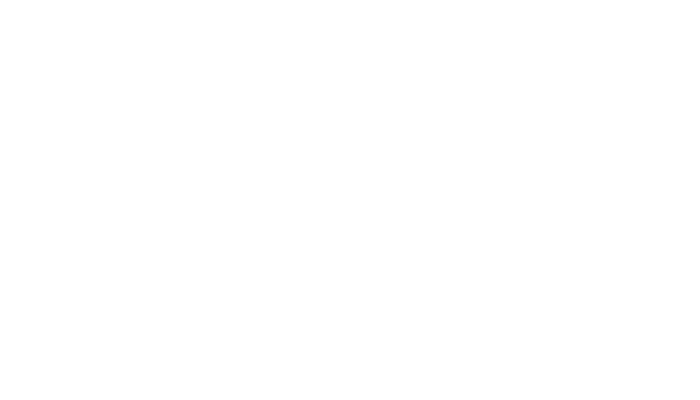

Text(0.5, 0, 'año')

In [16]:
#2 - año
avg_kmpl_year =df.groupby('model_year').mean()['kmpl']
std_kmpl_year =df.groupby('model_year').std()['kmpl']
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.set_title("año vs kmpl")
ax.grid()
x = avg_kmpl_year.index
ax.errorbar(x=x, y=avg_kmpl_year.values, xerr=0.1, yerr=std_kmpl_year.values, 
            fmt='.', elinewidth=None, ecolor=None, capsize=None)
ax.set_ylabel('kmpl')
ax.set_xlabel("año")

<IPython.core.display.Javascript object>


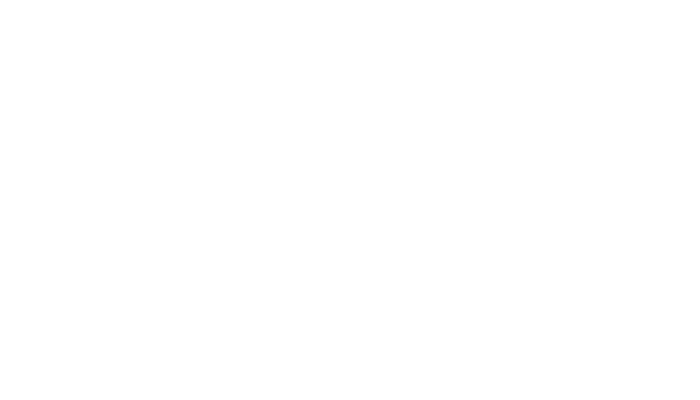

Text(0.5, 0, 'peso')

In [17]:
#2- peso
avg_kmpl_year =df.groupby('weight').mean()['kmpl']
std_kmpl_year =df.groupby('weight').std()['kmpl']
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.set_title("peso vs kmpl")
ax.grid()
x = avg_kmpl_year.index
ax.errorbar(x=x, y=avg_kmpl_year.values, xerr=0.1, yerr=std_kmpl_year.values,
            fmt='.', elinewidth=None, ecolor=None, capsize=None)
ax.set_ylabel('kmpl')
ax.set_xlabel("peso")

<IPython.core.display.Javascript object>


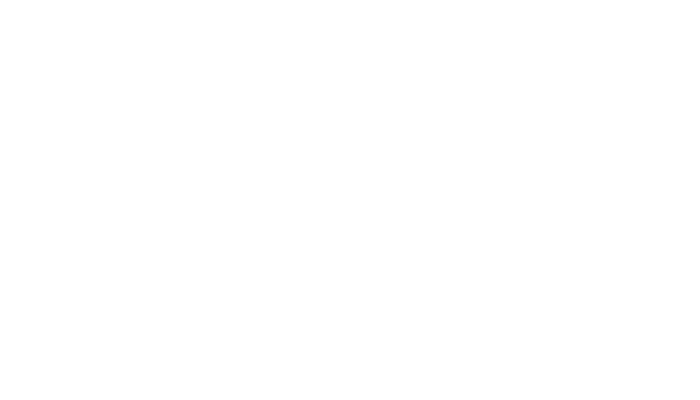

Text(0.5, 0, 'origen')

In [18]:
#2- origen
avg_kmpl =df.groupby('origin').mean()['kmpl']
std_kmpl =df.groupby('origin').std()['kmpl']
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.set_title("origen vs kmpl")
ax.grid()
x =  list(map(lambda origin:['Europe', 'Japan', 'USA'].index(origin),avg_kmpl.index))

ax.errorbar(x=x, y=avg_kmpl.values, xerr=0.1, yerr=std_kmpl.values,
            fmt='.', elinewidth=None, ecolor=None, capsize=None)

plt.xticks(x,avg_kmpl.index)
ax.set_ylabel('kmpl')
ax.set_xlabel("origen")

<IPython.core.display.Javascript object>


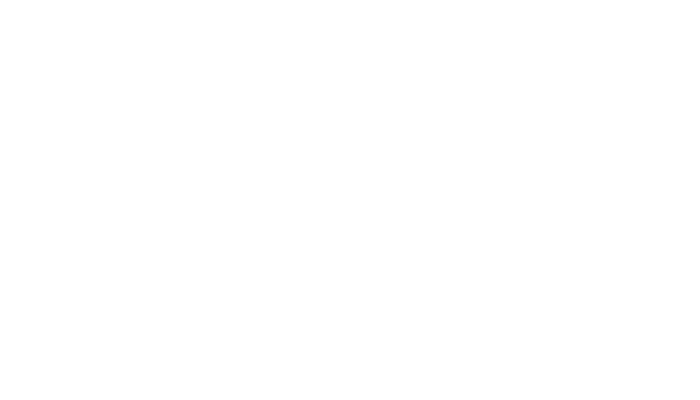

Text(0.5, 0, 'cylinders')

In [19]:
#2- cilindros
avg_kmpl =df.groupby('cylinders').mean()['kmpl']
std_kmpl =df.groupby('cylinders').std()['kmpl']
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.set_title("cylinders vs kmpl")
ax.grid()
x =  avg_kmpl.index
ax.errorbar(x=x, y=avg_kmpl.values, xerr=0.1, yerr=std_kmpl.values,
            fmt='.', elinewidth=None, ecolor=None, capsize=None)
ax.set_ylabel('kmpl')
ax.set_xlabel("cylinders")

<IPython.core.display.Javascript object>


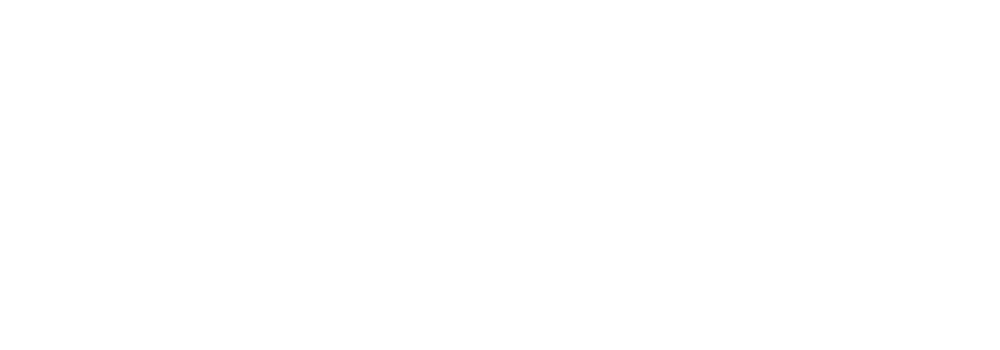

In [20]:
#2- brand
avg_kmpl =df.groupby('brand').mean()['kmpl']
std_kmpl =df.groupby('brand').std()['kmpl']

brands =  list(avg_kmpl.index)
x = list(map(lambda b: brands.index(b),avg_kmpl.index))
fig, ax = plt.subplots(figsize=(10, 3.5), tight_layout=True, facecolor='w')
ax.grid()
ax.errorbar(x=x, y=avg_kmpl.values, xerr=0.1, yerr=std_kmpl.values,
            fmt='.', elinewidth=None, ecolor=None, capsize=None)
ax.set_title("brand vs kmpl")
ax.set_ylabel('kmpl')
ax.set_xlabel("brand")
plt.xticks(x, brands,rotation=90)
plt.show()

### Gráficos interactivos

1. Construya una interfaz gráfica usando `ipywidgets` que permita seleccionar dos atributos y los gráfique como un *scatter plot*
    1. El primer atributo será el eje de abscisas y el segundo atributo el eje de ordenadas
    1. Ese el atributo de origen como el color de los marcadores
1. Los gráficos deben ser legibles, los ejes deben estar etiquetados, use leyenda para los marcadores

In [21]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
%matplotlib notebook

In [22]:
#df.index.get_level_values('brand').unique().name

options=list(df.iloc[1].index)

def plot_update(x,y):
    fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='c')
    ax.set_title("{0} vs {1}".format(x,y))
    ax.grid()
    p_x = df.loc[:,x].values
    p_y = df.loc[:,y].values
    ax.scatter(x=p_x, y=p_y)
    display(ax)

widgets.interact(plot_update, y=options,x=options);

interactive(children=(Dropdown(description='x', options=('kmpl', 'cylinders', 'displacement', 'horsepower', 'w…